In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import dataset 
df=pd.read_csv("/home/magnolia/ML_PROJECTS/datasets/housing_/train.csv")

In [3]:
df.shape

(1460, 81)

In [4]:
# Exploratory Data Analysis
summary_stats = df.describe()
summary_statsT = df.describe().T
summary_feats = df.describe().columns

In [5]:
summary_stats.shape[1]

38

In [6]:
summary_stats

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Find if features of object type are present in df generated by describe()
for col in df.select_dtypes('object').columns:
    if col in df.describe().columns:
        print(col)

In [9]:
features = df.columns

In [10]:
features_na=[col for col in df.columns if sum(df[col].isna()!=0)]

features_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [11]:
featTypeDict = {feature: str(df[feature].dtype) for feature in df.columns}

featTypeDict

{'Id': 'int64',
 'MSSubClass': 'int64',
 'MSZoning': 'object',
 'LotFrontage': 'float64',
 'LotArea': 'int64',
 'Street': 'object',
 'Alley': 'object',
 'LotShape': 'object',
 'LandContour': 'object',
 'Utilities': 'object',
 'LotConfig': 'object',
 'LandSlope': 'object',
 'Neighborhood': 'object',
 'Condition1': 'object',
 'Condition2': 'object',
 'BldgType': 'object',
 'HouseStyle': 'object',
 'OverallQual': 'int64',
 'OverallCond': 'int64',
 'YearBuilt': 'int64',
 'YearRemodAdd': 'int64',
 'RoofStyle': 'object',
 'RoofMatl': 'object',
 'Exterior1st': 'object',
 'Exterior2nd': 'object',
 'MasVnrType': 'object',
 'MasVnrArea': 'float64',
 'ExterQual': 'object',
 'ExterCond': 'object',
 'Foundation': 'object',
 'BsmtQual': 'object',
 'BsmtCond': 'object',
 'BsmtExposure': 'object',
 'BsmtFinType1': 'object',
 'BsmtFinSF1': 'int64',
 'BsmtFinType2': 'object',
 'BsmtFinSF2': 'int64',
 'BsmtUnfSF': 'int64',
 'TotalBsmtSF': 'int64',
 'Heating': 'object',
 'HeatingQC': 'object',
 'CentralAi

In [12]:
feat_categories = {}
for col in df.select_dtypes('object').columns:
    feat_categories[col] = df[col].unique()

feat_categories.keys()

dict_keys(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'])

In [13]:
meanL=[]
minL = []
maxL = []
stdL = []

for col in df.select_dtypes('int64').columns: 
    mean_ = np.mean(df[col])
    min_ = np.min(df[col])
    max_ = np.max(df[col])
    std_ = np.std(df[col])

    meanL.append(mean_), minL.append(min_), maxL.append(max_), stdL.append(std_)

pd.DataFrame({
    'feat': df.select_dtypes('int64').columns,
    'mean': meanL,
    'min_': minL,
    'max' : maxL,
    'std' : stdL
    })

,feat,mean,min_,max,std
0,Id,730.500000,1,1460,421.465598
1,MSSubClass,56.897260,20,190,42.286082
2,LotArea,10516.828082,1300,215245,9977.846105
3,OverallQual,6.099315,1,10,1.382523
4,OverallCond,5.575342,1,9,1.112418
5,YearBuilt,1971.267808,1872,2010,30.192559
6,YearRemodAdd,1984.865753,1950,2010,20.638335
7,BsmtFinSF1,443.639726,0,5644,455.941866
8,BsmtFinSF2,46.549315,0,1474,161.264017
9,BsmtUnfSF,567.240411,0,2336,441.715605


In [20]:
df_int64 = df.select_dtypes('int64').fillna('0')

In [ ]:
id=df_int64['Id']
df_int64=df_int64.drop(columns=['Id'])

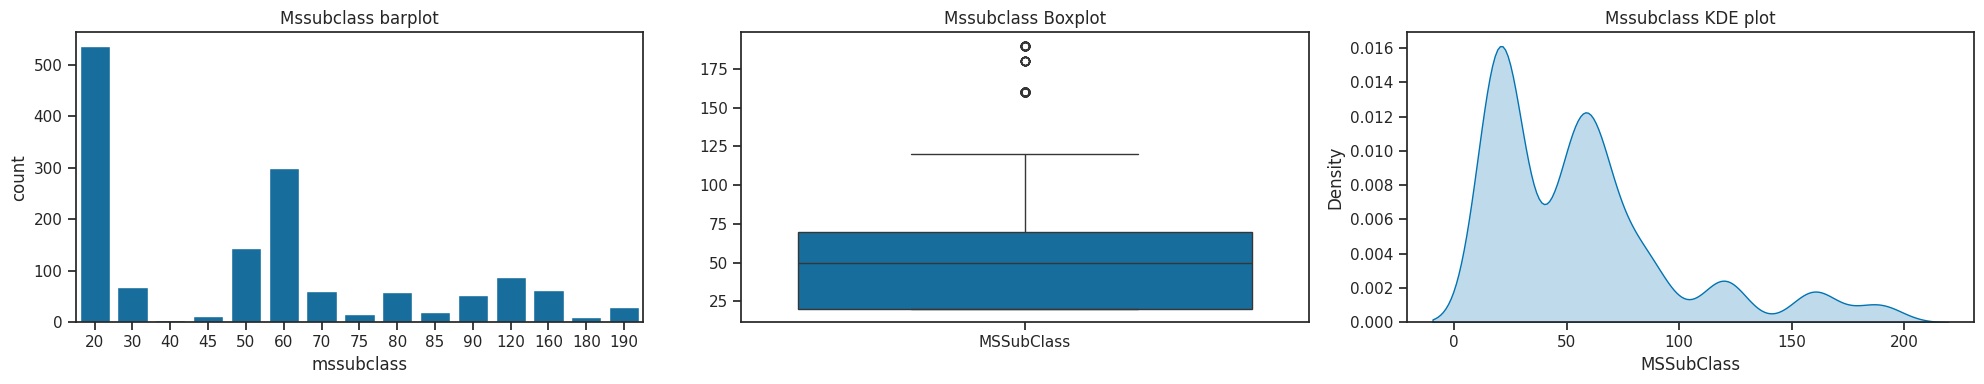

In [200]:
# find the # of occurrences for each category in a MSSubclass column.
mssubclass=df_int64['MSSubClass']
mssubclass_df=pd.DataFrame(mssubclass)
mssubclassCounts=np.unique(df_int64['MSSubClass'], return_counts=True)
mssubclassCounts_df=pd.DataFrame({'mssubclass':mssubclassCounts[0], 'count':mssubclassCounts[1]})
# some graphs
fig, axes = plt.subplots(1,3, figsize=(20,4))
# Bar Chart
sns.barplot(mssubclassCounts_df, x="mssubclass", y="count", ax = axes[0])
axes[0].set_title("Mssubclass barplot")

# Box plot
sns.boxplot(mssubclass_df, ax=axes[1])
axes[1].set_title("Mssubclass Boxplot")

# Density plot
sns.kdeplot(mssubclass, fill=True)
axes[2].set_title("Mssubclass KDE plot")

plt.tight_layout()


In [186]:
df_int64.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

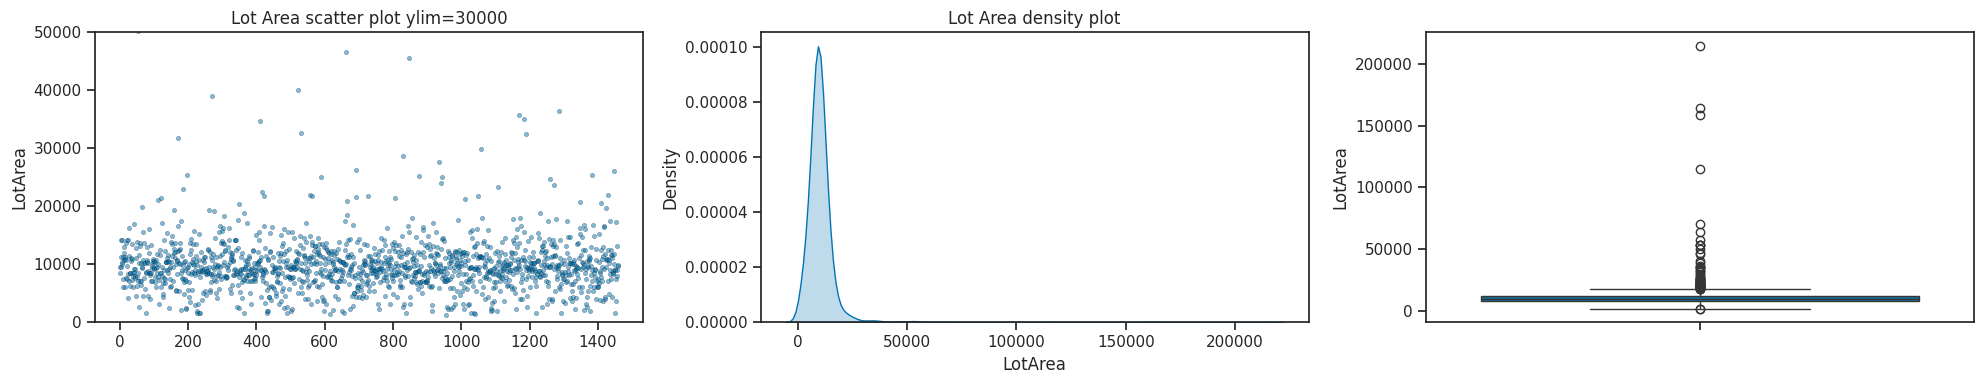

In [229]:
# Feature: Lot Area
# graphs
fig, axes = plt.subplots(1,3, figsize=(20,4))

# scatter plot
sns.scatterplot(df_int64['LotArea'], s=10, alpha=0.5, edgecolor='black', ax=axes[0])
axes[0].set_title('Lot Area scatter plot ylim=30000')
axes[0].set_ylim([0,50000])

# Density plot
sns.kdeplot(df_int64['LotArea'], fill=True, ax=axes[1])
axes[1].set_title('Lot Area density plot')

# Violin plot
sns.boxplot(df_int64['LotArea'], ax=axes[2])

fig.tight_layout()

<Axes: >

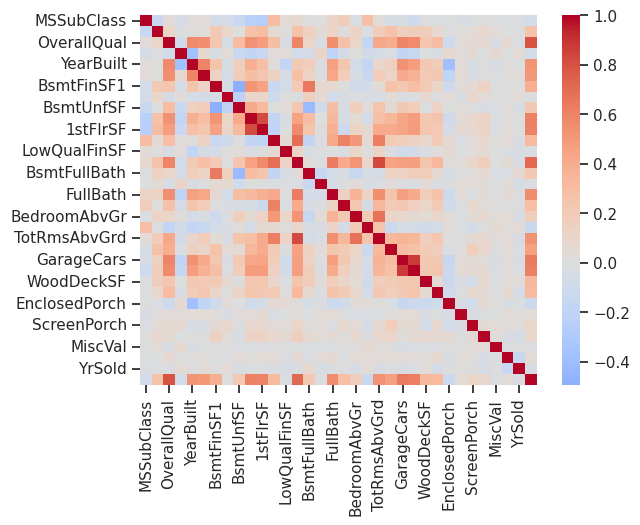

In [197]:
sns.heatmap(df_int64.corr(), cmap='coolwarm', center=0)

In [237]:
df_int64.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [253]:
# Dataset 
X = df.select_dtypes('int64').drop(columns=['Id','SalePrice']).to_numpy()
y = df['SalePrice'].to_numpy()
features = df.select_dtypes('int64').drop(columns=['Id','SalePrice']).columns

In [ ]:
# Checking for NaNs in columns.
# Should have checked it before converting to numpy array or else feature matrix would have had NaNs introduced.
# Always check for NaNs and deal with them.
# No issue here, none of the columns of dtype=int64 have NaNs.

def check_NaNs(df):
    for col in df.columns:
        if sum(df[col].isna()!=0):
            print(col)



In [415]:
# Linear Model! 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

train_accuracy=model.score(X_train, y_train)
test_accuracy=model.score(X_test, y_test)

metrics_model1=[train_accuracy, test_accuracy, mae, mse, rmse, r2]

In [363]:
mae, mse, rmse, r2

(21599.12488267179, 1210951915.3300734, 34798.734392648155, 0.8196170443761757)

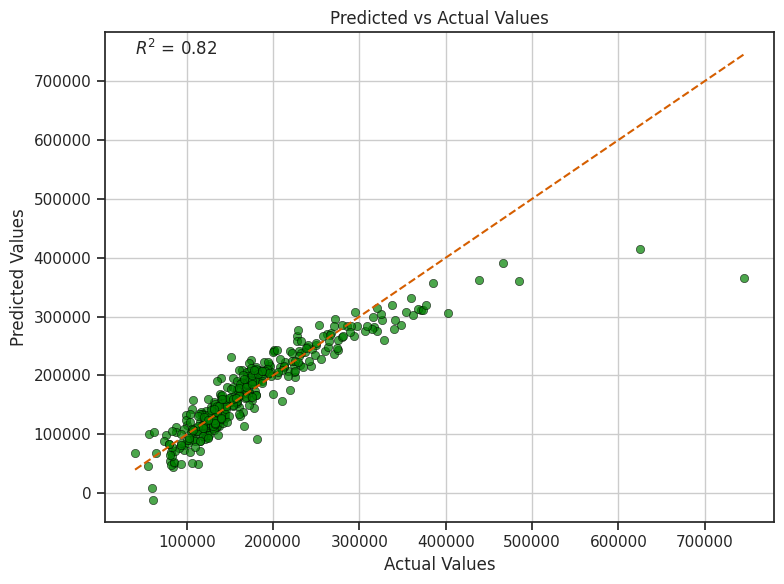

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, c='green', edgecolor='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal reference line

plt.text(
    x=y_test.min(), y=y_test.max(), 
    s=f"$R^2$ = {r2:.2f}", 
    fontsize=12, 
    bbox=dict(facecolor='none', edgecolor='none', boxstyle='square, pad=0.5')
)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.grid(True)
plt.tight_layout()
plt.show()

In [407]:
# evaluate on test set
test = pd.read_csv("/home/magnolia/ML_PROJECTS/datasets/housing_/test.csv")
test_int64=test.select_dtypes('int64')

check_NaNs(test_int64) # check for features with NaNs

# Test SET #
test_int_64_no_id = test_int64.drop(columns='Id')
test_Ids = test_int64['Id']



# Test dataset and training data columns (dtype=int64) don't match.
# Linear Regression Model expected more features.

feat_not_in_test = []
for col in df_int64.columns:
    if col not in test_int_64_no_id.columns:
        feat_not_in_test.append(col)

# Remove the features not present in the test set? 
# feat_not_in_test 

# Retrain Model with features absent in Test Set
df_retrain = df_int64.drop(columns=feat_not_in_test).to_numpy()
target_retrain = df_int64['SalePrice']
Id_retrain = df['Id'] 

X_train, X_test, y_train, y_test = train_test_split(df_retrain, target_retrain, test_size=0.2, random_state=1)
model_2 = LinearRegression()
model_2.fit(X_train, y_train)
y_pred2 = model_2.predict(X_test)

train_accuracy = model_2.score(X_train, y_train)
test_accuracy = model_2.score(X_test, y_test)

mae2 = mean_absolute_error(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = root_mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

metrics_model2 = [train_accuracy, test_accuracy, mae2, mse2, rmse2, r2]

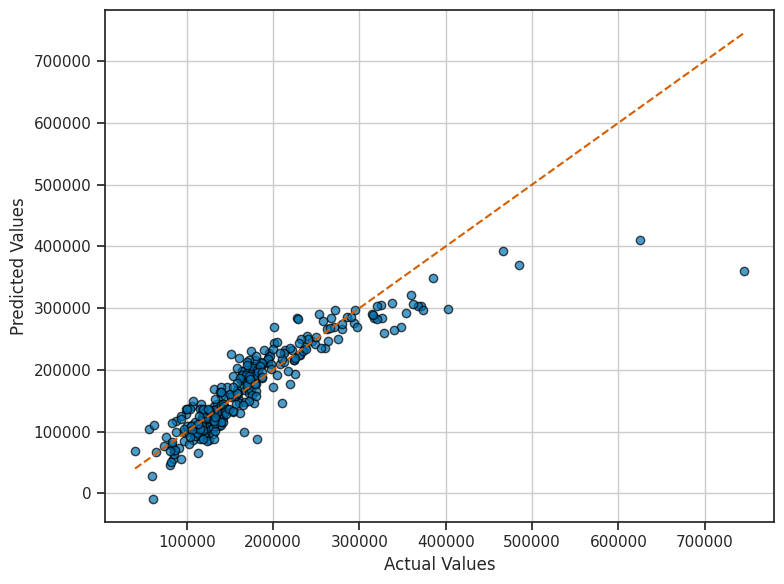

In [386]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred2, edgecolor='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.ylabel("Predicted Values")
plt.xlabel("Actual Values")
plt.grid(True)
plt.tight_layout()

In [389]:
pd.options.display.float_format = '{:.2f}'.format
compare_metrics = pd.DataFrame({'model1': metrics_model1, 'model2': metrics_model2}, index=['train', 'test', 'mae', 'mse', 'rmse', 'r2'])
compare_metrics

,model1,model2
train,0.80,0.78
test,0.82,0.79
mae,21599.12,23310.69
mse,1210951915.33,1467871911.17
rmse,34798.73,38312.82
r2,0.82,0.79


In [ ]:
# Predicting SalePrice from Test Set.
X_finalTest = test_int_64_no_id.to_numpy()
# Fit the second Linear Regression model w lesser features 
predictions = model_2.predict(X_finalTest)

In [ ]:
output = pd.DataFrame({'Id':test_Ids, 'SalePrice':predictions})
output.to_csv('submission.csv', index=False)

# Kaggle Submission.
# Model RMSE Score: 22950.33885

In [ ]:
# Improvements! 
# Something to do with dtype('object) features?
# Try a tree based model first?

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(random_state=1)
rf_regressor.fit(X_train, y_train)
rf_regressor.score(X_train, y_train) # CRAZZZZZZZZZZZZZYYYYYYYYYYY on the first try? lol. But then again, tree based algorithms tend to overfit data so, it shouldn't be surprising.

0.9742957154195556

In [427]:
rf_regressor.score(X_test, y_test) # oh nvm, the model's over fitting training data. [training accuracy > test accuracy]

0.9007647420429112

In [484]:
# RMSE
pred_rf = rf_regressor.predict(X_test)
root_mean_squared_error(y_test, pred_rf)

25810.63571685319

<Axes: ylabel='Density'>

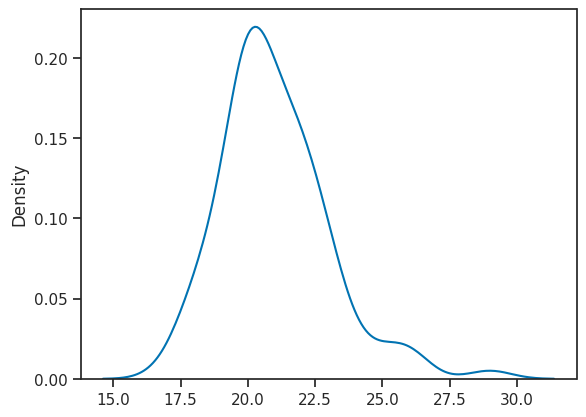

In [466]:
# Depth of the Forest
tree_depths = [i.get_depth() for i in rf_regressor.estimators_]

mean_depth = np.mean(tree_depths)
max_depth = np.max(tree_depths)
min_depth = np.min(tree_depths)

mean_depth, max_depth, min_depth
# the Mean depth of the forest is 21.
# there are trees with depth 29 and trees with depth 17!

tree_depth_counts = np.unique(tree_depths, return_counts=True)

sns.kdeplot(tree_depths)

<Axes: ylabel='Density'>

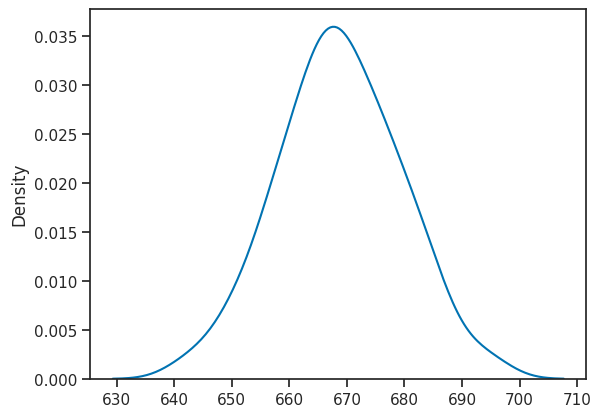

In [464]:
# Leaves on Trees
tree_leaves = [i.get_n_leaves() for i in rf_regressor.estimators_]

max_leaves = np.max(tree_leaves)
min_leaves = np.min(tree_leaves)
mean_leaves = np.mean(tree_leaves)

max_leaves, min_leaves, mean_leaves

sns.kdeplot(tree_leaves)

In [485]:
# Hyper Parameter tuning 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': tree_depths
}
# Initialise the model
forest = RandomForestRegressor()

# Set up Grid Search
grid_search = GridSearchCV(estimator=forest,
             param_grid=param_grid,
             cv=5,
             scoring='neg_root_mean_squared_error',
             n_jobs=-1)

# start training
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [22, 21, 20, 23, 26, 20, 19, 20, 23, 20,
                                       21, 22, 26, 18, 19, 22, 29, 23, 23, 21,
                                       17, 20, 22, 21, 22, 19, 23, 18, 23, 21, ...]},
             scoring='neg_root_mean_squared_error')

In [ ]:
BestRF = grid_search.best_estimator_
BestRF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 19,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
grid_search.score(X_test, y_test)

-25434.47420018351

In [ ]:
BestRF.score(X_test, y_test), BestRF.score(X_train, y_train)

(0.9036255143202663, 0.9731963853574617)

In [529]:
rf_predictions = BestRF.predict(X_finalTest)

ValueError: X has 25 features, but RandomForestRegressor is expecting 33 features as input.